In [1]:
import matplotlib.pyplot as plt


In [2]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.capstone_1_db
collection = db.good_reads_collections
data = pd.DataFrame(list(collection.find()))

In [3]:
data

,_id,author,birth_country,book_year,current_readers,language,ratings_number,title
0,5c64589c13218a20ad311a4e,Jane Austen,England,NaN,110625,English,2513940,Pride and Prejudice
1,5c64589d13218a20ad311a4f,Margaret Atwood,Canada,NaN,92600,English,1015611,The Handmaid's Tale
2,5c64589e13218a20ad311a50,J.K. Rowling,United Kingdom,NaN,86256,English,5766110,Harry Potter and the Sorcerer's Stone
3,5c64589f13218a20ad311a51,George R.R. Martin,United States,NaN,85450,English,1703982,A Game of Thrones
4,5c6458a013218a20ad311a52,George Orwell,India,NaN,78516,English,2509232,1984
5,5c6458a113218a20ad311a53,G. Norman Lippert,United States,NaN,75904,English,21844,James Potter and the Hall of Elders' Crossing
6,5c6458a213218a20ad311a54,Michelle Obama,United States,NaN,74817,English,100115,Becoming
7,5c6458a313218a20ad311a55,Yuval Noah Harari,Israel,NaN,72033,English,211877,Sapiens: A Brief History of Humankind
8,5c6458a513218a20ad311a56,Victor Hugo,France,NaN,67235,English,601732,Les Misérables
9,5c6458a513218a20ad311a57,Oxford University Press,United Kingdom,NaN,61282,English,3211,The New Oxford American Dictionary


In [4]:
data_split = data[["birth_country", "current_readers"]]

In [5]:
summed_data = data_split.groupby(["birth_country"]).sum()
summed_data

,current_readers
birth_country,
Australia,105415
Brazil,74819
Canada,185304
China,69510
England,301805
France,134486
French Republic,68962
India,157116
Ireland,158691


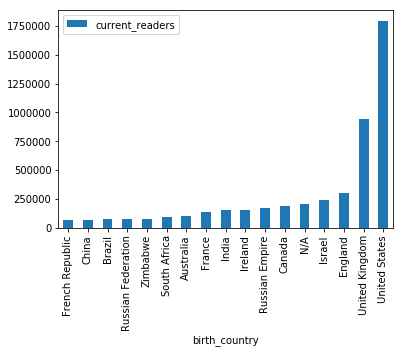

In [8]:
summed_data.sort_values("current_readers").plot.bar()

In [9]:
demographics = pd.read_csv("../goodreads_demographics.csv", delimiter = ";")

In [12]:
demographics.head()

,count,avg_books_added,name
0,2156121,37.52,United States
1,117395,6.29,Iran
2,110294,8.74,Indonesia
3,84157,1.05,Thailand
4,83403,35.16,Canada


In [13]:
count_demographics = demographics[["count", "name"]]

In [19]:
slice_demo = count_demographics.sort_values("count", ascending = False)[:10]

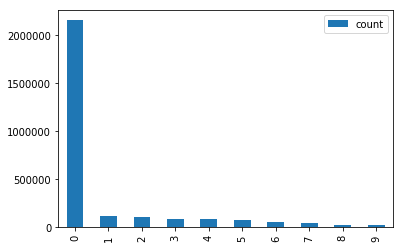

In [20]:
slice_demo.plot.bar()

# Maps! But for Later!

In [21]:
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10,12,40,70,23,43,100,43]
})
data
 
# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)

"""
# I can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
""" 
# Save it as html
m.save('mymap.html')


In [22]:
m